In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
def sigmoid(z):
    s = 1/(1+(np.exp(-z)))
    return s

In [3]:
def cost(a,y):
    loss = 0 
    for i in range(a.shape[0]):
        #if a[i] != 0 and a[i] != 1:        #(The comment code is used becasue i'm getting nans)
            loss += -(y[i] * np.log(a[i])) - ((1 - y[i]) * np.log(1 - a[i]))
    
        #else:                             #this avoid exp values and 0 and 1 adds the required output. Can be ignored if learning rate is low
            #loss += 0
            
    return (loss/a.shape[0])   #cost function

In [4]:
def relu(x):
    return np.maximum(0,x)

In [5]:
def deriv_relu(x):
    return x >= 0 

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
features = data.data
target = data.target

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [9]:
def  train(x_train,y_train,hidden_units = 52,epochs = 25,batch_size = 16, lr =0.001):
    weights_0 = 0.2*np.random.random((x_train.shape[1],hidden_units)) - 0.1
    weights_1 = 0.2*np.random.random((hidden_units,1)) - 0.1
    losses = []
    numbers = range(x_train.shape[0])
    batches_per_iteration = math.ceil(x_train.shape[0]/batch_size)
    
    for i in range(epochs):
        loss = 0
        for b in range(batches_per_iteration):
            sample_list = np.random.choice(numbers,batch_size,replace = False)
            x = x_train[sample_list,:]
            y = (y_train[sample_list])
            H = x.dot(weights_0)
            ah = relu(H)
            a = sigmoid(ah.dot(weights_1))
            loss += cost(a,y)
            
            dz = a - (np.array(y).reshape(a.shape))
            dw_1 = ah.T.dot(dz)
            dH = deriv_relu(dz.dot(weights_1.T))
            dw_0 = x.T.dot(dH)
            weights_0 -= (lr*dw_0)
            weights_1 -= (lr*dw_1)
        avg_loss = loss / batches_per_iteration
        losses.append(avg_loss)
        if i % 10 == 0:
            print("Epoch: ", i , avg_loss)

    return losses,weights_0,weights_1

In [10]:
cost,w1,w2 = train(x_train,y_train,hidden_units = 64,epochs = 50,batch_size = 100, lr =0.0001) #learning rate is very low. so as epochs increases it may reach the optimal gradient descent

Epoch:  0 [0.63074687]
Epoch:  10 [0.17525146]
Epoch:  20 [0.17242193]
Epoch:  30 [0.25846823]
Epoch:  40 [0.15100483]


In [11]:
def predict(x_test,w_input,w_output):
    H = x_test.dot(w_input)
    ah = relu(H)
    a = sigmoid(ah.dot(w_output))
    return a

In [12]:
pred = predict(x_test,w1,w2)

In [13]:
threshold = input("Provide a threshold between 0 and 1 depending on recall and precision: ")
threshold = float(threshold)
y_pred = np.where(pred > 0.5,1,0)

Provide a threshold between 0 and 1 depending on recall and precision: 0.7


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        67
           1       0.98      0.91      0.95       104

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



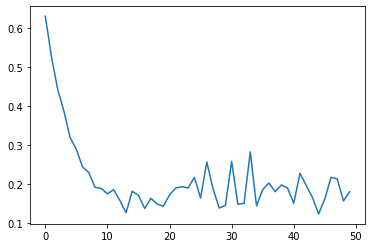

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.show()